# Session 5: Generalisation

### Neil D. Lawrence


### Review
- Last time: introduced basis functions.
- Showed how to maximize the likelihood of a non-linear model that's linear in parameters.
- Explored the different characteristics of different basis function models

### Polynomial Fits to Olymics Data

In [1]:
import pods
import numpy as np
import scipy as sp
import mlai
from matplotlib import pyplot as plt
import teaching_plots as plot
%matplotlib inline

In [2]:
max_basis = 7
basis = mlai.polynomial

data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

data_limits = [1892, 2020]
num_data = x.shape[0]

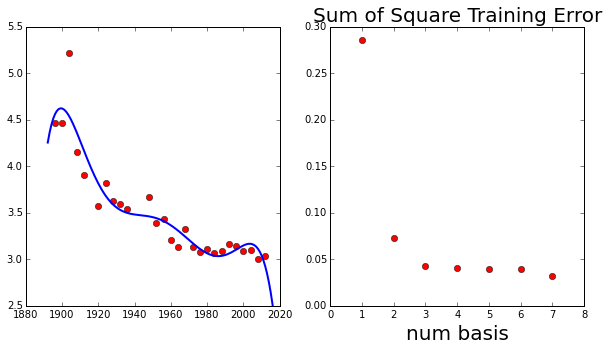

In [3]:
plot.rmse_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1), 
              model=mlai.LM, basis=basis, data_limits=data_limits, 
              xlim=data_limits, objective_ylim=[0, 0.3])

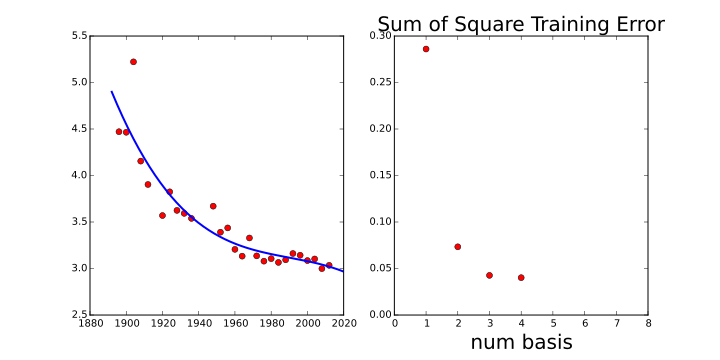

In [4]:
pods.notebook.display_plots('olympic_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

### Overfitting
- Increase number of basis functions we obtain a better 'fit' to the data.
- How will the model perform on previously unseen data?
- Let's consider predicting the future.

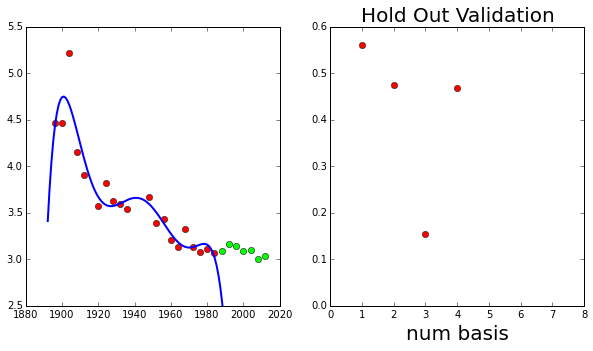

In [5]:
plot.holdout_fit(x, y, param_name='num_basis', 
                 param_range=(1, max_basis+1), 
                 model=mlai.LM, basis=basis, data_limits=data_limits,
                 permute=False, objective_ylim=[0, 0.6], xlim=data_limits)

### Extrapolation

- Here we are training beyond where the model has learnt.
- This is known as *extrapolation*.
- Extrapolation is predicting into the future here, but could be:
    - Predicting back to the unseen past (pre 1892)
    - Spatial prediction (e.g. Cholera rates outside Manchester given rates inside Manchester).

### Alan Turing
- He was a formidable Marathon runner. 
- In 1946 he ran a time 2 hours 46 minutes.
- What is the probability he would have won an Olympics if one had been held in 1946?  
![Alan Turing running in 1946](http://www.turing.org.uk/turing/pi2/run.jpg)
<center>*Alan Turing, in 1946 he was only 11 minutes slower than the winner of the 1948 games. Would he have won a hypothetical games held in 1946? Source: [Alan Turing Internet Scrapbook](http://www.turing.org.uk/scrapbook/run.html).*</center>


### Interpolation
- Predicting the wining time for 1946 Olympics is *interpolation*.
- This is because we have times from 1936 and 1948.
- If we want a model for *interpolation* how can we test it?
- One trick is to sample the validation set from throughout the data set.

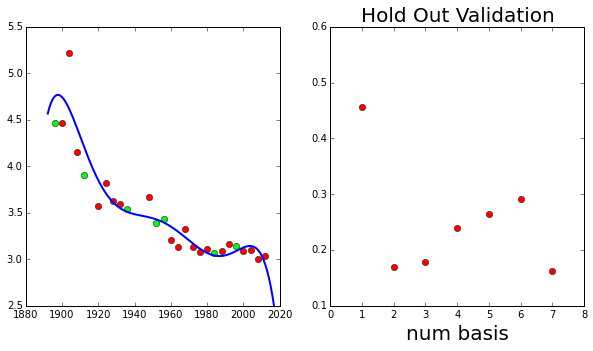

In [6]:
plot.holdout_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1), 
                 model=mlai.LM, basis=basis, data_limits=data_limits, 
                 xlim=data_limits, prefix='olympic_val_inter', objective_ylim=[0.1, 0.6], permute=True)

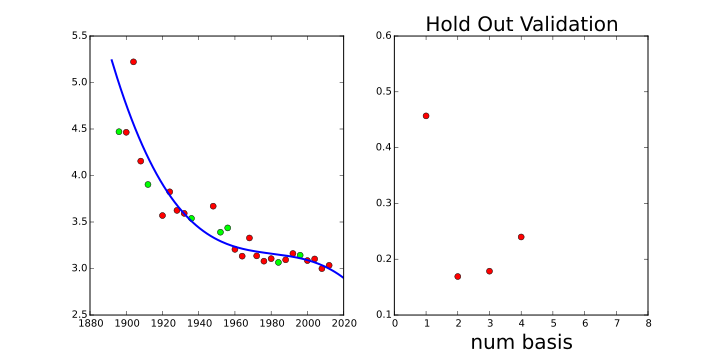

In [7]:
pods.notebook.display_plots('olympic_val_inter_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis))

### Choice of Validation Set

- The choice of validation set should reflect how you will use the model in practice.
- For extrapolation into the future we tried validating with data from the future.
- For interpolation we chose validation set from data.
- For different validation sets we could get different results.

### Leave One Out Error
- Take training set and remove one point.
- Train on the remaining data.
- Compute the error on the point you removed (which wasn't in the training data).
- Do this for each point in the training set in turn.
- Average the resulting error. 
- This is the leave one out error.

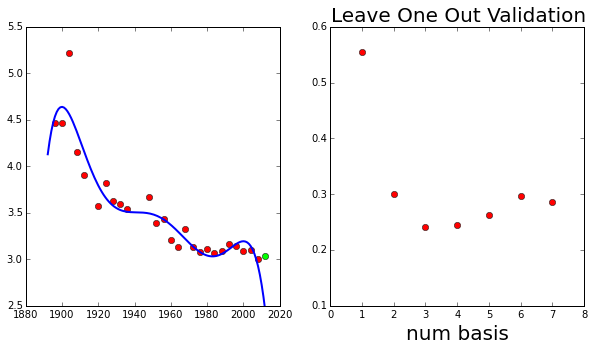

In [8]:
plot.loo_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1),  
             model=mlai.LM, basis=basis, data_limits=data_limits, 
             xlim=data_limits, objective_ylim=[0.1, 0.6], prefix='olympic_loo')

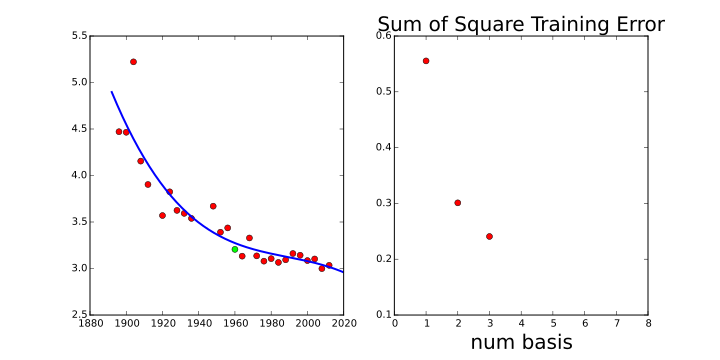

In [10]:
pods.notebook.display_plots('olympic_loo{part:0>3}_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', num_basis=(1, max_basis), part=(0,x.shape[0]))

### Bias Variance Decomposition

Expected test error for different variations of the *training data* sampled from, $\Pr(\mathbf{x}, y)$

$$\mathbb{E}\left[ (y - f^*(\mathbf{x}))^2 \right]$$

Decompose as

$$\mathbb{E}\left[ (y - f(\mathbf{x}))^2 \right] = \text{bias}\left[f^*(\mathbf{x})\right]^2 + \text{variance}\left[f^*(\mathbf{x})\right] +\sigma^2$$


### Bias

- Given by
    $$\text{bias}\left[f^*(\mathbf{x})\right] = \mathbb{E}\left[f^*(\mathbf{x})\right] - f(\mathbf{x})$$
    
- Error due to bias comes from a model that's too simple.

### Variance

- Given by
    $$\text{variance}\left[f^*(\mathbf{x})\right] = \mathbb{E}\left[\left(f^*(\mathbf{x}) -  \mathbb{E}\left[f^*(\mathbf{x})\right]\right)^2\right]$$
    
- Slight variations in the training set cause changes in the prediction. Error due to variance is error in the model due to an overly complex model. 

### $k$ Fold Cross Validation

- Leave one out error can be very time consuming.
- Need to train your algorithm $n$ times.
- An alternative: $k$ fold cross validation.

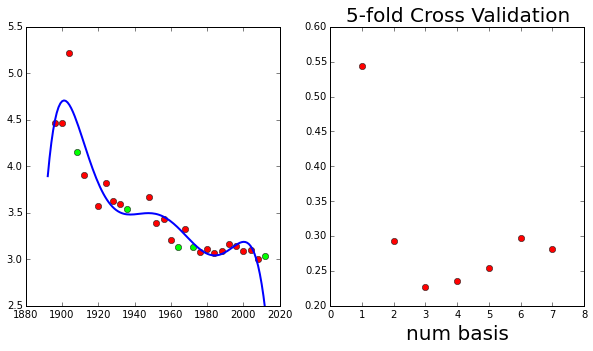

In [11]:
plot.cv_fit(x, y, param_name='num_basis', param_range=(1, max_basis+1),  
               model=mlai.LM, basis=basis, data_limits=data_limits,
               xlim=data_limits, objective_ylim=[0.2,0.6], num_parts=5)

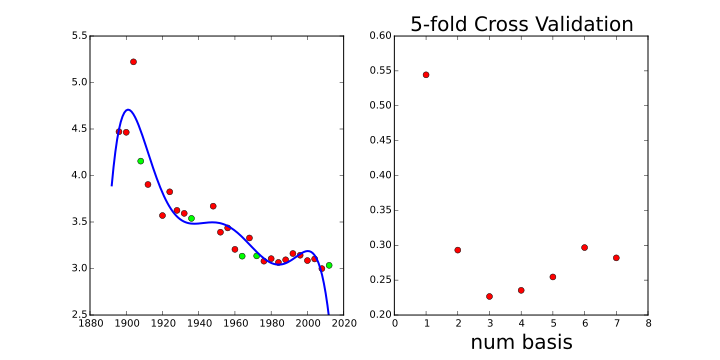

In [12]:
pods.notebook.display_plots('olympic_{num_parts}'.format(num_parts=5) + 'cv{part:0>2}_LM_polynomial_num_basis{num_basis:0>3}.svg', 
                            directory='./diagrams', part=(0,5),num_basis=(1, max_basis))

### Reading
- Section 1.5 of @Rogers:book11